# Stability and convergence criteria for the linear response of $CO$

In [1]:
%autosave 0
from BigDFT import Logfiles as lf
from BigDFT import Calculators as C
from futile import Yaml
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import sys
sys.path.insert(0,'../')
import Routine as R
outputpath = '/linear-response'

Autosave disabled


The aim of this notebook is to perform an assessment of the reliability of the results given by the linear response. 
First of all we analyze the absorption spectrum and discuss its stability in terms of both the number of virtual orbitals and the dimension of the simulation box. 
Then we try to define a set of tools for perfoming a (semi)-automatic analysis of the excitonic states of the system. We want to define a procedure that is able to state if a given excitation can be considered as "well-sampled" or not (using the given values of number of virtual states and dimension of the simulation box)

## Construction of the relevant dictionaries

We set some general parameters and perform the analysis reading the results obtained in the other notebook

In [2]:
numOrb = 5
simSetup = {
    'free-bc' : {'rmult' : [7.0,9.0], 'nVirtMax' : [282,184]}
    }

In [3]:
statPol = {}
spectrum = {}
#excitations = {}
Data = {}
for bc,s in simSetup.iteritems():
    statPol[bc] = {}
    spectrum[bc] = {}
    #excitations[bc] = {}
    Data[bc] = {}
    
    path = bc+outputpath
    print 'path is : ', path
    %cd $path
    for ind,r in enumerate(s['rmult']):
        filename = 'log/statPol_rmult_'+str(r)+'.yaml'
        statPol[bc][r] = Yaml.load(filename)
        filename = 'log/spectrum_rmult_'+str(r)+'.yaml'
        spectrum[bc][r] = Yaml.load(filename)
        #filename = 'log/excitations_rmult_'+str(r)+'.yaml'
        #excitations[bc][r] = Yaml.load(filename)
        logpath = 'log/log-Rmult_'+str(r)+'_numVirt_'+str(s['nVirtMax'][ind])+'.yaml'
        log = !ls $logpath
        print log
        Data[bc][r] = lf.Logfile(log[0])
    %cd ../..

path is :  free-bc/linear-response
/media/DATA/RICERCA/LINEAR RESPONSE/LR-nb/POLARIZABILITY/CO/free-bc/linear-response
['log/log-Rmult_7.0_numVirt_282.yaml']
['log/log-Rmult_9.0_numVirt_184.yaml']
/media/DATA/RICERCA/LINEAR RESPONSE/LR-nb/POLARIZABILITY/CO


## Analysis of the convergence of the statical polarizability

In [4]:
statPol_ref = [13.24,13.24,18.73]

Comparison of the i-component of the statical polarizability in function of the number of virtual orbitals (or of the maximum energy) for each of the simulation setup:

bc :  free-bc  rmult =  9.0 emax =  [3.0167941999161787, 4.3094826981350556, 7.2314524993976885, 8.9277883623547112, 10.818712134871515, 13.073048953789513, 14.631157814241387]
bc :  free-bc  rmult =  7.0 emax =  [4.7092649475258499, 6.8979039393471222, 11.769892182889784, 14.592087939986909, 17.652506598375012, 21.228889529652154, 24.44724842786805, 27.323453211598128, 28.318510596246966, 31.664867000278793]


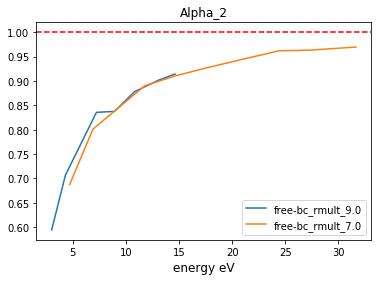

In [5]:
%matplotlib inline
alphaInd = 2
plotEnergy = True
for bc in statPol:
    for r,s in statPol[bc].iteritems():
        nalpha = s.keys()
        nalpha.sort()
        if plotEnergy:
            emax = [R.engMax(Data[bc][r],numOrb,na) for na in nalpha]
            print 'bc : ', bc, ' rmult = ', r, 'emax = ', emax
        else:
            print 'bc : ', bc, ' rmult = ', r, 'nalpha = ', nalpha
        val = [] 
        for na in nalpha:
            val.append(s[na][alphaInd])
        val = np.array(val)/statPol_ref[alphaInd]
        if plotEnergy:
            plt.plot(emax,val,label=bc+'_rmult_'+str(r))
        else:
            plt.plot(nalpha,val,label=bc+'_rmult_'+str(r))
plt.axhline(y=1.0, color='r', linestyle='--')
if plotEnergy:
    plt.xlabel('energy eV', size=12)
else:
    plt.xlabel('number of virtual orbitals', size=12)
plt.title('Alpha_'+str(alphaInd))
plt.legend()

## Stability of the  spectrum

Firstly we analyze the convergence of the spectrum in function of the number of virtual orbitals

In [8]:
bc = 'free-bc'
r = 9.0
part = 'imagPart'

184


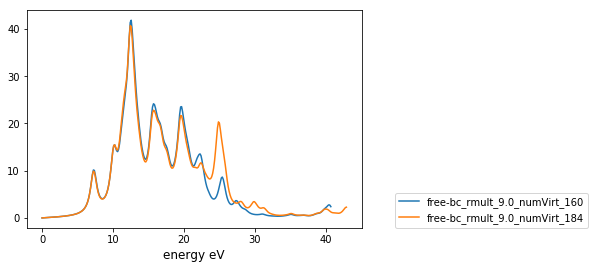

In [10]:
nVmax = simSetup[bc]['nVirtMax'][simSetup[bc]['rmult'].index(r)]
print nVmax
na_plot = [32,160,192,256,nVmax]
for na in na_plot:
    if na in spectrum[bc][r]:
        plt.plot(spectrum[bc][r][na]['omega'],spectrum[bc][r][na][part],label = bc+'_rmult_'+str(r)+'_numVirt_'+str(na))
plt.xlabel('energy eV', size=12)
plt.legend()
plt.legend(loc=(1.1,0))

The analysis of the plot for the two values of rmult show that:
* For rmult = 7.0 the spectrum is stable up to 35 eV
* For rmult = 9.0 the spectrum is stable up to 25 eV

Then we compare the spectrum with different boundary conditions

In [11]:
part = 'imagPart'

free-bc


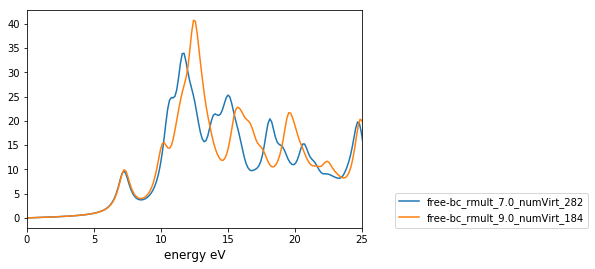

In [13]:
offs = 0.0
for bc,sim in simSetup.iteritems():
    print bc
    for r in sim['rmult']:
        na = simSetup[bc]['nVirtMax'][simSetup[bc]['rmult'].index(r)]
        plt.plot(spectrum[bc][r][na]['omega'],offs+np.array(spectrum[bc][r][na][part]),label = bc+'_rmult_'+str(r)+'_numVirt_'+str(na))
        #offs+=15
plt.xlabel('energy eV', size=12)
plt.xlim(0,25)
plt.legend(loc=(1.1,0))
plt.show()